<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/FakeNews_Classifications(Bidirectional_LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### How to use this project to in your colab notebook
**Follow the steps:-**
1. Download Your Kaggle APIs Key and password file from your kaggle account in setting section
2. Upload APIs key json file in your colab notebook and then run 3 cell of line which start from 2 upto 4 (these cell should only one time)

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re

In [7]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [8]:
# !kaggle datasets download -d algord/fake-news

In [9]:
# import zipfile
# zip = zipfile.ZipFile("/content/fake-news.zip",'r')
# zip.extractall("/content")
# zip.close()

In [10]:
df=pd.read_csv('FakeNewsNet.csv')

In [11]:
df.shape

(23196, 5)

In [12]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [13]:
df.tail()

,title,news_url,source_domain,tweet_num,real
23191,Pippa Middleton wedding: In case you missed it...,https://www.express.co.uk/news/royal/807049/pi...,www.express.co.uk,52,1
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,hollywoodlife.com/2018/03/13/zayn-malik-gigi-h...,hollywoodlife.com,7,0
23193,Jessica Chastain Recalls the Moment Her Mother...,http://www.justjared.com/2018/01/17/jessica-ch...,www.justjared.com,26,1
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",www.intouchweekly.com/posts/tristan-thompson-f...,www.intouchweekly.com,24,0
23195,Kelly Clarkson Performs a Medley of Kendrick L...,https://www.billboard.com/articles/news/bbma/8...,www.billboard.com,85,1


In [14]:
final_df=df[['title','real']]

In [15]:
final_df.head()

,title,real
0,Kandi Burruss Explodes Over Rape Accusation on...,1
1,People's Choice Awards 2018: The best red carp...,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,1
3,Colombian singer Maluma sparks rumours of inap...,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,1


In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

##only once time
nltk.download('stopwords')

ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
corpus=[]
def text_cleaning(text):

  reviews = re.sub('[^a-zA-Z]', ' ', text)
  reviews=reviews.lower()
  reviews=reviews.split()
  reviews=[ps.stem(word) for word in reviews if word not in stopwords.words('english')]
  reviews=' '.join(reviews)
  corpus.append(reviews)

In [18]:
# Assuming final_df is your DataFrame
for title in final_df['title']:
    text_cleaning(title)

In [19]:
print(corpus[:10])

['kandi burruss explod rape accus real housew atlanta reunion video', 'peopl choic award best red carpet look', 'sophia bush send sweet birthday messag one tree hill co star hilari burton breyton eva', 'colombian singer maluma spark rumour inappropri relationship aunt', 'gossip girl year later upper east sider shock world chang pop cultur forev', 'gwen stefani got dump blake shelton jealousi drama exclus', 'broward counti sheriff fire lie parkland', 'amber rose shut french montana date rumor call rapper bruvaaa', 'mindi kale make first post babi appear disneyland wrinkl time co star', 'katharin mcphee butcher toni nomin drink']


In [20]:
y=final_df['real']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
###importing the library which are required for evaluation the model (means evaluation metrics)
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [22]:
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))

In [23]:
X=cv.fit_transform(corpus).toarray()

In [24]:
X.shape,y.shape

((23196, 5000), (23196,))

In [25]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
cv.get_feature_names_out()

array(['aaron', 'aaron carter', 'aaron rodger', ..., 'zolciak',
       'zolciak biermann', 'zone'], dtype=object)

In [27]:
count_df=pd.DataFrame(X,columns=cv.get_feature_names_out())

In [28]:
count_df.head()

,aaron,aaron carter,aaron rodger,ab,abbey,abbi,abbi lee,abbi lee miller,abc,abc news,...,zayn malik,zendaya,zeta,zeta jone,zig,zoe,zoe saldana,zolciak,zolciak biermann,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Let's Implements the LSTM Model and Bidirectional LSTM**

In [29]:
from tensorflow import keras
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [30]:
##initilazition of voc. size
voc_size=5000

one_hot_rep=[one_hot(word, voc_size) for word in corpus]

In [31]:
one_hot_rep[:10]

[[2078, 4663, 3212, 3008, 3922, 713, 3902, 2983, 2696, 1356],
 [1270, 3909, 1237, 4828, 2740, 3357, 575],
 [1859,
  4431,
  2885,
  997,
  4305,
  3806,
  274,
  561,
  3484,
  1446,
  2562,
  2330,
  4849,
  216,
  4214],
 [2066, 503, 731, 1462, 3841, 2166, 806, 1908],
 [480, 485, 2630, 4864, 1532, 3675, 4219, 3875, 142, 693, 210, 517, 4896],
 [4362, 2787, 2366, 1377, 2139, 569, 514, 612, 999],
 [1201, 2300, 801, 4120, 2992, 95],
 [923, 3805, 4078, 2592, 4006, 1621, 3838, 1396, 4832, 3999],
 [1092, 2457, 2094, 2324, 1898, 2814, 3842, 2488, 3654, 635, 1446, 2562],
 [3559, 1528, 3795, 1574, 631, 4049]]

In [32]:
sent_length=20
embedd_doc=pad_sequences(one_hot_rep,padding='pre',maxlen=sent_length)

In [33]:
print(embedd_doc,embedd_doc.shape)

[[   0    0    0 ... 2983 2696 1356]
 [   0    0    0 ... 2740 3357  575]
 [   0    0    0 ... 4849  216 4214]
 ...
 [   0    0    0 ...  549  457 4620]
 [   0    0    0 ... 4713 3312  999]
 [   0    0    0 ... 3669 3258 1237]] (23196, 20)


In [34]:
##declaring the embedding features
embedding_vector_features=50

##model initilization
model=Sequential()

model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [35]:
##compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
X_final=embedd_doc
y_final=np.array(y)

In [37]:
print(X_final.shape,y_final.shape,type(y_final),type(X_final))

(23196, 20) (23196,) <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [38]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.33,random_state=42)

In [39]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/10
243/243 [==============================] - 26s 70ms/step - loss: 0.4678 - accuracy: 0.7959 - val_loss: 0.4001 - val_accuracy: 0.8263
Epoch 2/10
243/243 [==============================] - 4s 15ms/step - loss: 0.3426 - accuracy: 0.8540 - val_loss: 0.3978 - val_accuracy: 0.8306
Epoch 3/10
243/243 [==============================] - 3s 13ms/step - loss: 0.2951 - accuracy: 0.8772 - val_loss: 0.4213 - val_accuracy: 0.8247
Epoch 4/10
243/243 [==============================] - 3s 12ms/step - loss: 0.2523 - accuracy: 0.8994 - val_loss: 0.4550 - val_accuracy: 0.8218
Epoch 5/10
243/243 [==============================] - 2s 9ms/step - loss: 0.2202 - accuracy: 0.9104 - val_loss: 0.5186 - val_accuracy: 0.8059
Epoch 6/10
243/243 [==============================] - 3s 11ms/step - loss: 0.1906 - accuracy: 0.9232 - val_loss: 0.5526 - val_accuracy: 0.8012
Epoch 7/10
243/243 [==============================] - 3s 11ms/step - loss: 0.1602 - accuracy: 0.9344 - val_loss: 0.6106 - val_accuracy: 0.8039

In [40]:
## importing the  visualization library
import matplotlib.pyplot as plt

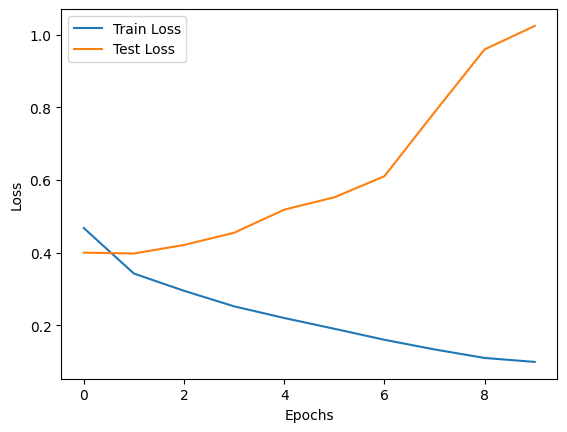

In [41]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Test Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

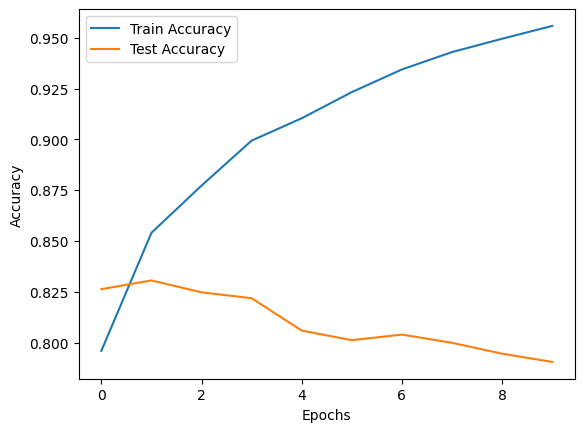

In [42]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Test Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [43]:
y_pred_lstm=model.predict(X_test)
len(y_pred_lstm)

240/240 [==============================] - 1s 2ms/step


7655

In [44]:
threshold = 0.5  # You can adjust this threshold based on your problem's needs

# Convert probabilities to binary labels
y_pred_binary = (y_pred_lstm >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.7904637491835401


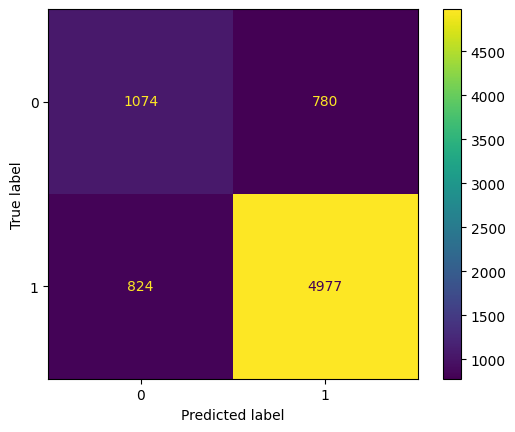

In [45]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_binary)).plot()

In [46]:
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

           0       0.57      0.58      0.57      1854
           1       0.86      0.86      0.86      5801

    accuracy                           0.79      7655
   macro avg       0.72      0.72      0.72      7655
weighted avg       0.79      0.79      0.79      7655



Improving this model through Dropout or BatchNorm

In [47]:
##declaring the embedding features
embedding_vector_features=50

##model initilization
model1=Sequential()

model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))

model1.add(Dropout(0.9))
model1.add(LSTM(100))
model1.add(Dropout(0.9))

model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.6))

model1.add(Dense(1,activation='sigmoid'))

In [48]:
model1.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [49]:
history1=model1.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/10
243/243 [==============================] - 16s 51ms/step - loss: 0.5828 - accuracy: 0.7415 - val_loss: 0.5366 - val_accuracy: 0.7578
Epoch 2/10
243/243 [==============================] - 5s 19ms/step - loss: 0.5049 - accuracy: 0.7716 - val_loss: 0.4311 - val_accuracy: 0.8153
Epoch 3/10
243/243 [==============================] - 2s 10ms/step - loss: 0.4533 - accuracy: 0.8013 - val_loss: 0.4151 - val_accuracy: 0.8185
Epoch 4/10
243/243 [==============================] - 3s 12ms/step - loss: 0.4278 - accuracy: 0.8139 - val_loss: 0.4078 - val_accuracy: 0.8229
Epoch 5/10
243/243 [==============================] - 3s 12ms/step - loss: 0.4181 - accuracy: 0.8183 - val_loss: 0.4013 - val_accuracy: 0.8278
Epoch 6/10
243/243 [==============================] - 3s 12ms/step - loss: 0.4083 - accuracy: 0.8263 - val_loss: 0.4028 - val_accuracy: 0.8289
Epoch 7/10
243/243 [==============================] - 2s 7ms/step - loss: 0.3987 - accuracy: 0.8305 - val_loss: 0.3978 - val_accuracy: 0.8264

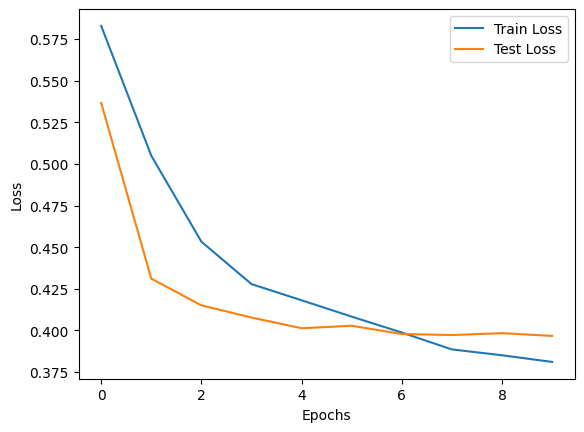

In [50]:
plt.plot(history1.history['loss'],label='Train Loss')
plt.plot(history1.history['val_loss'],label='Test Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

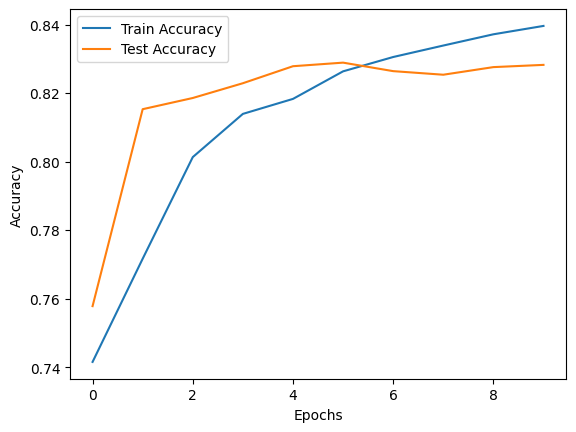

In [51]:
plt.plot(history1.history['accuracy'],label='Train Accuracy')
plt.plot(history1.history['val_accuracy'],label='Test Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [52]:
y_pred_lstm1=model1.predict(X_test)

240/240 [==============================] - 1s 2ms/step


In [53]:
threshold=0.5

# Convert probabilities to binary labels
y_pred_binary1 = (y_pred_lstm1 >= threshold).astype(int)

In [83]:
print("Train Total Accuracy:- ",accuracy_score(y_test,y_pred_binary1)*100)

Train Total Accuracy:-  82.82168517308949


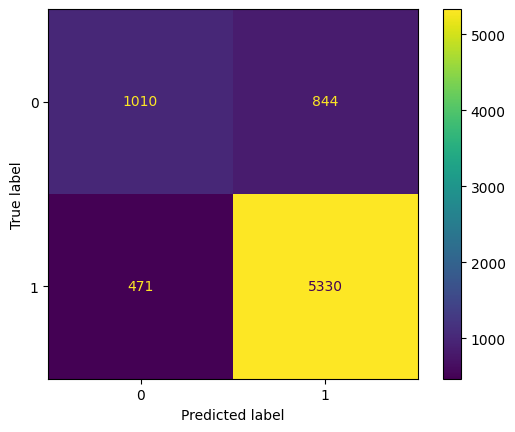

In [55]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_binary1)).plot()

In [56]:
print(classification_report(y_test,y_pred_binary1))

              precision    recall  f1-score   support

           0       0.68      0.54      0.61      1854
           1       0.86      0.92      0.89      5801

    accuracy                           0.83      7655
   macro avg       0.77      0.73      0.75      7655
weighted avg       0.82      0.83      0.82      7655



Now, Let's Implement the Bidirectional LSTM(RNNs)

In [57]:
##creating the embedding vectors features
embedding_vector_features=50

##init bidirectional model
model2=Sequential()

model2.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))

model2.add(Bidirectional(LSTM(100)))

model2.add(Dense(128,activation='relu'))

model2.add(Dense(1,activation='sigmoid'))

In [58]:
##let's compile the model
model2.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [59]:
##let's train the model
history2=model2.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/10
243/243 [==============================] - 26s 88ms/step - loss: 0.4538 - accuracy: 0.8011 - val_loss: 0.3996 - val_accuracy: 0.8289
Epoch 2/10
243/243 [==============================] - 5s 21ms/step - loss: 0.3431 - accuracy: 0.8541 - val_loss: 0.4299 - val_accuracy: 0.8250
Epoch 3/10
243/243 [==============================] - 3s 14ms/step - loss: 0.3048 - accuracy: 0.8714 - val_loss: 0.4245 - val_accuracy: 0.8252
Epoch 4/10
243/243 [==============================] - 3s 13ms/step - loss: 0.2630 - accuracy: 0.8929 - val_loss: 0.4658 - val_accuracy: 0.8255
Epoch 5/10
243/243 [==============================] - 3s 12ms/step - loss: 0.2265 - accuracy: 0.9094 - val_loss: 0.5058 - val_accuracy: 0.8085
Epoch 6/10
243/243 [==============================] - 3s 11ms/step - loss: 0.1899 - accuracy: 0.9256 - val_loss: 0.5656 - val_accuracy: 0.7991
Epoch 7/10
243/243 [==============================] - 2s 10ms/step - loss: 0.1586 - accuracy: 0.9357 - val_loss: 0.6351 - val_accuracy: 0.805

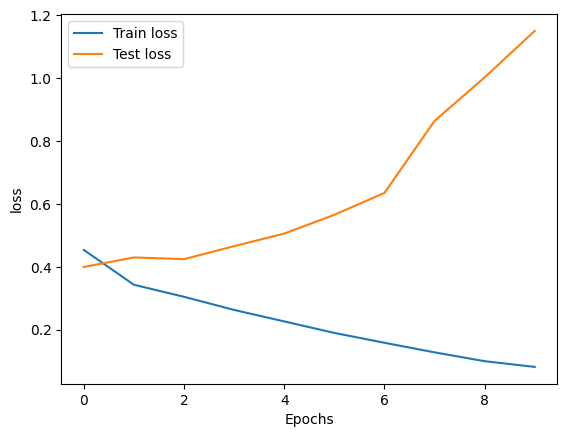

In [60]:
plt.plot(history2.history['loss'],label='Train loss')
plt.plot(history2.history['val_loss'],label='Test loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

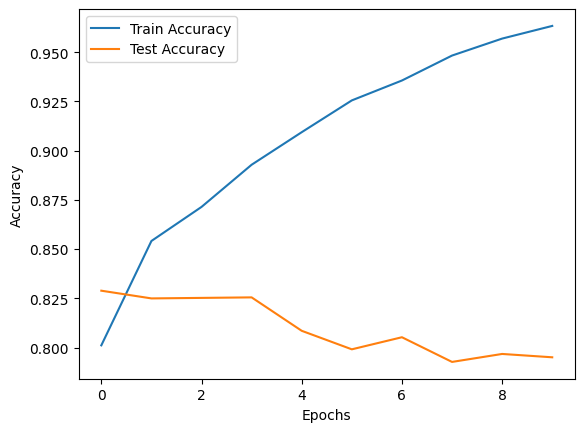

In [61]:
plt.plot(history2.history['accuracy'],label='Train Accuracy')
plt.plot(history2.history['val_accuracy'],label='Test Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [62]:
y_pred_blstm=model2.predict(X_test)

240/240 [==============================] - 1s 3ms/step


In [63]:
threshold=0.5
y_pred_binary3=(y_pred_blstm >= threshold).astype(int)

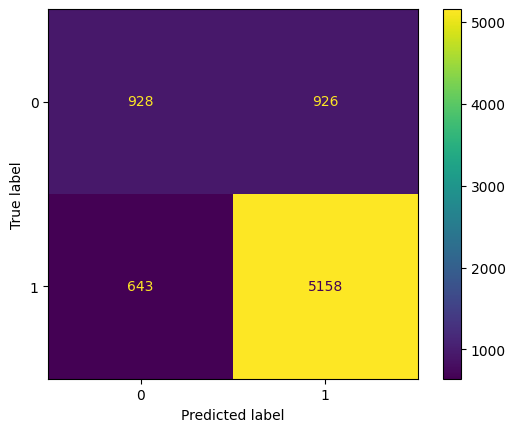

In [64]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_binary3)).plot()

In [65]:
print(classification_report(y_test,y_pred_binary3))

              precision    recall  f1-score   support

           0       0.59      0.50      0.54      1854
           1       0.85      0.89      0.87      5801

    accuracy                           0.80      7655
   macro avg       0.72      0.69      0.70      7655
weighted avg       0.79      0.80      0.79      7655



**Now Let's tr with Dropout Reg**

In [66]:
##init the model
model3=Sequential()

##creatinig the model
model3.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))

model3.add(Dropout(0.9))
model3.add(Bidirectional(LSTM(100)))
model3.add(Dropout(0.9))

model3.add(Dense(128,activation='relu'))
model.add(Dropout(0.9))

model3.add(Dense(1,activation='sigmoid'))

In [67]:
##now compile the model
model3.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [68]:
##let's train the model
history3=model3.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/20
243/243 [==============================] - 19s 59ms/step - loss: 0.5553 - accuracy: 0.7518 - val_loss: 0.4512 - val_accuracy: 0.8026
Epoch 2/20
243/243 [==============================] - 4s 16ms/step - loss: 0.4587 - accuracy: 0.8014 - val_loss: 0.4182 - val_accuracy: 0.8185
Epoch 3/20
243/243 [==============================] - 4s 16ms/step - loss: 0.4280 - accuracy: 0.8151 - val_loss: 0.4092 - val_accuracy: 0.8221
Epoch 4/20
243/243 [==============================] - 3s 13ms/step - loss: 0.4060 - accuracy: 0.8243 - val_loss: 0.4039 - val_accuracy: 0.8256
Epoch 5/20
243/243 [==============================] - 3s 11ms/step - loss: 0.3925 - accuracy: 0.8319 - val_loss: 0.3997 - val_accuracy: 0.8289
Epoch 6/20
243/243 [==============================] - 3s 12ms/step - loss: 0.3884 - accuracy: 0.8326 - val_loss: 0.4050 - val_accuracy: 0.8303
Epoch 7/20
243/243 [==============================] - 3s 11ms/step - loss: 0.3792 - accuracy: 0.8380 - val_loss: 0.3968 - val_accuracy: 0.829

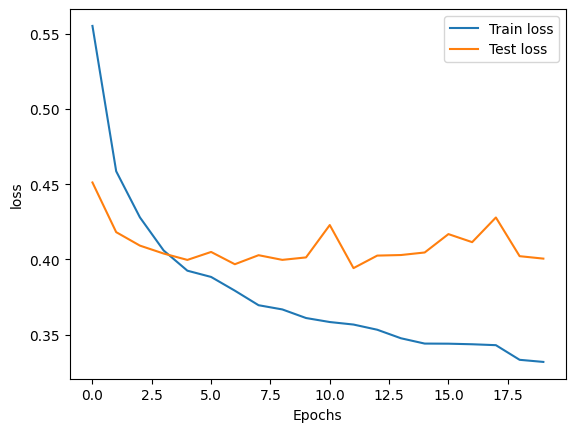

In [69]:
plt.plot(history3.history['loss'],label='Train loss')
plt.plot(history3.history['val_loss'],label='Test loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

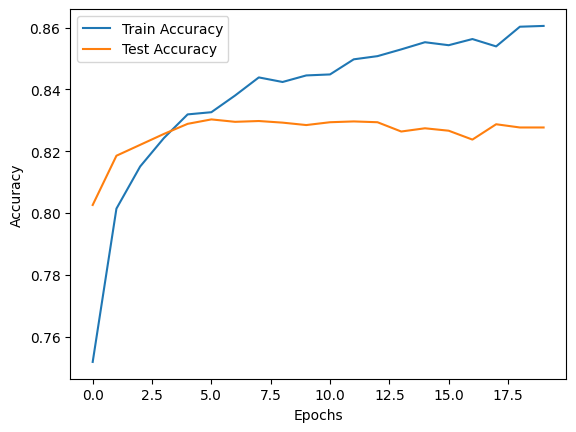

In [70]:
plt.plot(history3.history['accuracy'],label='Train Accuracy')
plt.plot(history3.history['val_accuracy'],label='Test Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [71]:
y_pred_blstm3=model3.predict(X_test)

240/240 [==============================] - 2s 4ms/step


In [76]:
threshold=0.5
y_pred_binary4=(y_pred_blstm3 >= threshold).astype(int)

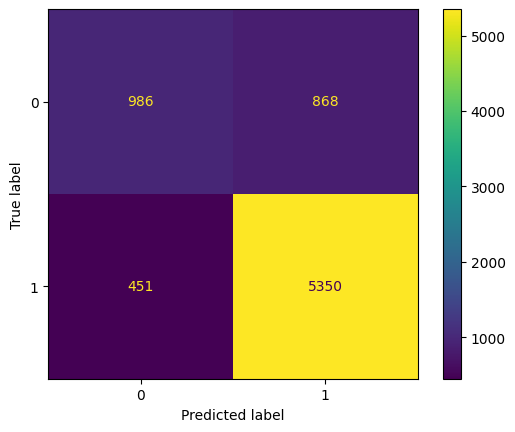

In [77]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_binary4)).plot()

In [82]:
print("Total Train Accuracy :- ",accuracy_score(y_test,y_pred_binary4)*100)

Total Train Accuracy :-  82.7694317439582


In [81]:
print(classification_report(y_test,y_pred_binary4))

              precision    recall  f1-score   support

           0       0.69      0.53      0.60      1854
           1       0.86      0.92      0.89      5801

    accuracy                           0.83      7655
   macro avg       0.77      0.73      0.74      7655
weighted avg       0.82      0.83      0.82      7655

